In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [15]:
xs = np.linspace(-1, 1, 1000)
ys = (xs ** 3) + 1

np.random.seed(42)  # for reproducibility
x_train = np.random.uniform(low=-1, high=1, size=(30,))
y_train = x_train ** 3 + 1 + np.random.normal(loc=0, scale=0.2, size=(30,))

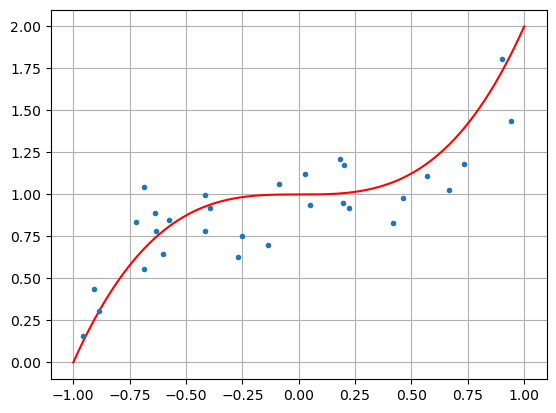

In [16]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

# plot the function
plt.plot(xs,ys, 'r-')
# plot the function
plt.plot(x_train,y_train, '.')

# turn on grid
ax.grid('on')

# show the plot
plt.show()

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

# Calculate training set error
y_pred = lin_reg.predict(x_train.reshape(-1, 1))
lin_reg_error = np.sum((y_train - y_pred.flatten()) ** 2)
print("Linear regression training set error:", lin_reg_error)

Linear regression training set error: 1.1906719413883364


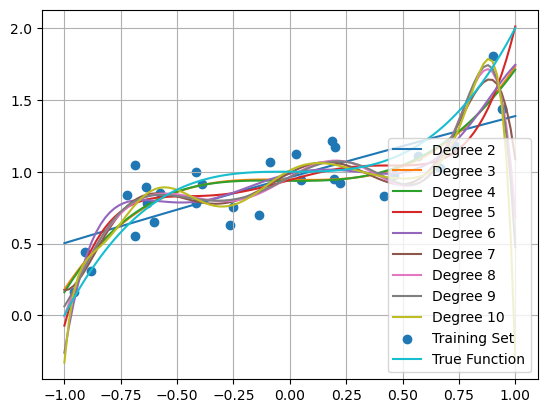

In [22]:
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
poly_reg_errors = []

# for polynomial power
for degree in degrees:
    # sklearn polyfeatures
    poly_features = PolynomialFeatures(degree=degree)
    x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))

    # train a linear regression based on these features
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly_train, y_train.reshape(-1, 1))

    # Calculate training set error
    y_poly_pred = lin_reg.predict(x_poly_train)
    poly_reg_error = np.sum((y_train - y_poly_pred.flatten()) ** 2)
    poly_reg_errors.append(poly_reg_error)

    # Plot polynomial regression curve
    x_range = np.linspace(-1, 1, 100)
    x_poly_range = poly_features.transform(x_range.reshape(-1, 1))
    y_poly_range = lin_reg.predict(x_poly_range)
    plt.plot(x_range, y_poly_range, label=f"Degree {degree}")

plt.scatter(x_train, y_train, label="Training Set")
plt.plot(x_range, x_range ** 3 + 1, label="True Function")
plt.grid('on')
plt.legend()
plt.show()